In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd

In [2]:
def coeff_hermite(n, x_data, y_data, dy_data):
    # n nodes, n - 1 degre
    Q = np.zeros((2*n, 2*n))

    # duplicate x in z odd and even
    z = np.zeros(2*n)
    z[0::2] = x_data[:n]
    z[1::2] = x_data[:n]

    Q[0::2, 0] = y_data[:n]
    Q[1::2, 0] = y_data[:n]

    Q[1::2, 1] = dy_data[:n]

    # first difference
    for i in range(1, n):
        Q[2*i, 1] = (Q[2*i, 0] - Q[2*i - 1, 0])/(z[2*i] - z[2*i - 1])

    # divide differences
    for i in range(2, 2*n):
        for j in range(2, i + 1):
            Q[i, j] = (Q[i, j - 1] - Q[i - 1, j - 1])/(z[i] - z[i - j])
    return Q

def nested_hermite(n, x, a, x_data):
    p = a[2*n-1]
    for k in range(1, 2*n):
        p = a[2*n-1-k] + (x - x_data[(2*n-1-k)//2])*p
    return p

## Table

In [25]:
x_data = np.array([1, 8, 27])
y_data = np.array([1, 2, 3])
dy_data = np.array([0.333333333, 0.083333333, 0.037037037])
n = len(x_data)
N = 9
a = np.round(coeff_hermite(n, x_data, y_data, dy_data), N)
df = pd.DataFrame(data=a, index=range(len(a[:,0])), columns=["f[z_i]", "f[;]" , "f[;;]", "f[;;;]", "f[;;;;]", "f[;;;;;]"])
pd.set_option("display.precision", N)
df

,f[z_i],f[;],f[;;],f[;;;],f[;;;;],f[;;;;;]
0,1.0,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000
1,1.0,0.333333333,0.000000000,0.000000000,0.000000000,0.000000000
2,2.0,0.142857143,-0.027210884,0.000000000,0.000000000,0.000000000
3,2.0,0.083333333,-0.008503401,0.002672498,0.000000000,0.000000000
4,3.0,0.052631579,-0.001615882,0.000264905,-0.000092600,0.000000000
5,3.0,0.037037037,-0.000820765,0.000041848,-0.000008579,0.000003232


### Polynomial

In [27]:
x = sp.symbols('x')
p = nested_hermite(n, x, np.diag(a), x_data)
p

(x - 1)*((x - 1)*((x - 8)*((3.232e-6*x - 0.000179864)*(x - 8) + 0.002672498) - 0.027210884) + 0.333333333) + 1.0

In [28]:
round(p.subs(x, 1.25), 9)

1.080004507

### Plot

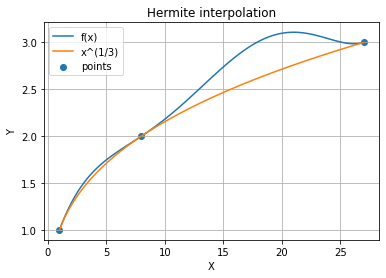

In [31]:
x_interval = np.linspace(np.min(x_data), np.max(x_data), 100)
y_interval = [p.subs(x, i) for i in x_interval]

plt.plot(x_interval, y_interval)
plt.plot(x_interval, [i**(1/3) for i in x_interval])
plt.scatter(x_data, y_data)
plt.grid(True)
plt.title("Hermite interpolation")
plt.legend(("f(x)","x^(1/3)", "points"))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()